# Cars4U Project

## Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business.
Data Dictionary 

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
#importing of necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing of data

df = pd.read_csv('used_cars_data.csv')

In [3]:
#check data head

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#check data tail

df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
#check random 10 rows from dataframe

np.random.seed(1)
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [6]:
#check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
#check data shape

df.shape

(7253, 14)

In [8]:
#check if there's null values

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<AxesSubplot:>

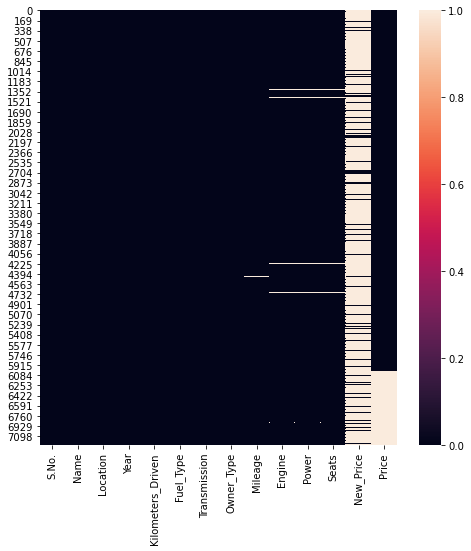

In [9]:
#checking null values using heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df.isna())


### Preparation of data for univariate/bivariate analysis

Some of the supposedly numeric values are in object type. Hence, before we continue to exploratory data analysis, we need to change the data type to the ideal one and to remove string units from numeric values.

In [10]:
#checking of unique values for location

df.value_counts('Location')

Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
dtype: int64

In [11]:
#checking of unique values for fuel type

df.value_counts('Fuel_Type')

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
dtype: int64

In [12]:
#checking of unique values for transmission

df.value_counts('Transmission')

Transmission
Manual       5204
Automatic    2049
dtype: int64

In [13]:
#checking of unique values for owner type

df.value_counts('Owner_Type')

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
dtype: int64

In [14]:
##checking of unique values for mileage

df.value_counts('Mileage')

Mileage
17.0 kmpl      207
18.9 kmpl      201
18.6 kmpl      144
21.1 kmpl      106
20.36 kmpl     105
              ... 
14.47 kmpl       1
17.16 kmpl       1
19.2 km/kg       1
11.88 km/kg      1
19.91 kmpl       1
Length: 450, dtype: int64

We need to convert the mileage data into float type, and there's 2 missing data for the column as per isnull() code above. It is also found that there are two units, kmpl and km/kg. Research suggests that kmpl is a unit used for diesel and petrol, while km/kg is for CNG and LPG. We will prove it as per below.


In [15]:
#to check mileage units for CNG, if it's in km/kg

np.random.seed(1)
df[df['Fuel_Type']=='CNG'].sample(n=10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2376,2376,Maruti Wagon R LXI CNG,Hyderabad,2013,83875,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2.95
5876,5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
3722,3722,Maruti SX4 Green Vxi (CNG),Kochi,2015,61000,CNG,Manual,First,22.1 km/kg,1586 CC,85.7 bhp,5.0,NaN,3.89
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,17.0 km/kg,1086 CC,null bhp,5.0,NaN,1.20
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
4098,4098,Maruti SX4 Green Vxi (CNG),Delhi,2012,82069,CNG,Manual,First,21.4 km/kg,1586 CC,103.3 bhp,5.0,NaN,2.65
6926,6926,Maruti Eeco 5 STR With AC Plus HTR CNG,Mumbai,2017,15500,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,NaN
5710,5710,Maruti Alto 800 CNG LXI,Mumbai,2013,26200,CNG,Manual,First,30.46 km/kg,796 CC,47.3 bhp,5.0,NaN,2.15
3511,3511,Maruti Alto Green LXi (CNG),Hyderabad,2012,92000,CNG,Manual,Second,26.83 km/kg,796 CC,38.4 bhp,5.0,NaN,2.10
4603,4603,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2019,21112,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,5.38


In [16]:
#to check mileage units for LPG, if it's in km/kg

np.random.seed(1)
df[df['Fuel_Type']=='LPG'].sample(n=10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
987,987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.45
2278,2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,1.65
2385,2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,3.10
6260,6260,Maruti Wagon R LXI DUO BSIII,Jaipur,2009,87829,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,NaN
936,936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.85
2941,2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,NaN,3.20
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
3595,3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.95
6918,6918,Hyundai Accent Executive LPG,Jaipur,2010,40000,LPG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,NaN,NaN
5997,5997,Maruti Wagon R Duo Lxi,Jaipur,2010,70000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.27


In [17]:
#to check mileage units for Petrol, if it's in kmpl

np.random.seed(1)
df[df['Fuel_Type']=='Petrol'].sample(n=10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5079,5079,Hyundai Elite i20 Asta Option,Coimbatore,2019,21134,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,9.78 Lakh,8.78
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2011,2011,Renault KWID RXT,Kolkata,2017,25000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,NaN,2.99
6350,6350,Ford Figo Petrol ZXI,Kolkata,2010,44287,Petrol,Manual,First,15.6 kmpl,1196 CC,70 bhp,5.0,NaN,NaN
4873,4873,Maruti Baleno Alpha,Chennai,2016,16000,Petrol,Manual,First,21.4 kmpl,1197 CC,83.1 bhp,5.0,8.8 Lakh,6.95
1329,1329,Hyundai i10 Sportz AT,Kochi,2014,61517,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,NaN,4.39
6548,6548,BMW X3 2.5si,Bangalore,2009,92000,Petrol,Automatic,First,11.5 kmpl,2497 CC,218 bhp,5.0,NaN,NaN
6279,6279,Jaguar XE Portfolio,Coimbatore,2018,14730,Petrol,Automatic,First,13.5 kmpl,1999 CC,246.74 bhp,5.0,56.98 Lakh,NaN
217,217,Hyundai i10 Magna 1.1,Pune,2012,44000,Petrol,Manual,Second,19.81 kmpl,1086 CC,68.05 bhp,5.0,NaN,2.90
1214,1214,Honda Jazz 1.2 VX i VTEC,Mumbai,2016,15399,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,6.40


In [18]:
#to check mileage units for Diesel, if it's in kmpl

np.random.seed(1)
df[df['Fuel_Type']=='Diesel'].sample(n=10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5734,5734,Toyota Innova 2.5 G4 Diesel 7-seater,Hyderabad,2006,142000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,6.25
26,26,Nissan Micra Diesel XV,Hyderabad,2012,54000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,4.25
4941,4941,Chevrolet Beat Diesel LT,Hyderabad,2012,61250,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.70
4063,4063,Audi Q5 2.0 TDI Premium Plus,Coimbatore,2015,60146,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,NaN,29.64
4354,4354,Toyota Etios Liva GD,Delhi,2012,72351,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.65
5904,5904,Ford Ecosport 1.5 DV5 MT Titanium,Mumbai,2015,44000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,7.35
1772,1772,Maruti Swift VDI,Hyderabad,2013,53996,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,5.45
4574,4574,Hyundai Creta 1.6 CRDi SX Option,Bangalore,2016,51000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13.25
3429,3429,Nissan Terrano XV 110 PS,Pune,2014,163000,Diesel,Manual,First,19.01 kmpl,1461 CC,108.5 bhp,5.0,NaN,5.00
2860,2860,Tata Bolt Quadrajet XM,Hyderabad,2017,98500,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0,7.97 Lakh,6.00


It seems that km/kg is for CNG/LNG, while kmpl is for diesel & petrol.

In [19]:
#checking data for Mileage of Electric cars

df[df['Fuel_Type']=='Electric']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


It is found that the two NaN data in mileage are from the fuel type electric. Meanwhile, as per further research, kmpl and km/kg can be assumed to be of the same level. Hence they will be dropped without having a special multiplier applied to the data.

In [20]:
#function removing unit from mileage data and converting it to float

def stmileage(input):
    if isinstance(input, str):  
        return float(input.replace(' kmpl', '').replace(' km/kg', '')) 

df['Mileage'] = df['Mileage'].apply(stmileage)
    
df['Mileage'].head()  

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

In [21]:
#function removing unit from engine data and converting it to float

def stengine(input):
    if isinstance(input, str):  
        return float(input.replace(' CC', '')) 

df['Engine'] = df['Engine'].apply(stengine)
    
df['Engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

In [22]:
#value_counts is used and there's a discovery that the null is in the form of the string 'null bhp'

df['Power'].value_counts()

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
null bhp     129
            ... 
261.5 bhp      1
552 bhp        1
74.93 bhp      1
560 bhp        1
254 bhp        1
Name: Power, Length: 386, dtype: int64

In [23]:
#checking data with 'null bhp'

df[df['Power'] == 'null bhp']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null bhp,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null bhp,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null bhp,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null bhp,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,null bhp,5.0,NaN,NaN
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,null bhp,5.0,NaN,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,null bhp,5.0,NaN,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,null bhp,5.0,NaN,NaN


There are 129 data with 'null bhp' at the Power column.

In [24]:
#function removing unit from power

def stpower(input):
    if isinstance(input, str):  
        return (input.replace('null bhp', '').replace(' bhp', '')) 

df['Power'] = df['Power'].apply(stpower)


In [25]:
#checking on data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 793.4+ KB


In [26]:
#replacing string '' into NaN

df['Power'] = df['Power'].replace('', np.nan)

In [27]:
#checking if values are still there
df['Power'].head() 

0    58.16
1    126.2
2     88.7
3    88.76
4    140.8
Name: Power, dtype: object

In [28]:
#converting data type into float
df['Power'] = df['Power'].astype('float')

In [29]:
#checking data type using df.info()
#here we can see that the 'null bhp' values has been changed into a null value. the non-null value decreased from 7207 to 7078

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [30]:
#checking data using df.head()

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [31]:
#using a function to remove the Lakh unit from New_Price column

def stnewprice(input):
    if isinstance(input, str):  
        return float(input.replace(' Lakh', '')) 

df['New_Price'] = df['New_Price'].apply(stnewprice)

df['New_Price'].head()

ValueError: could not convert string to float: '1.28 Cr'

There seems to be different price currency for the table due to the error above. Hence, we will update the function to replace the unit 'Cr' as well in addition to 'Lakh'. From research, we can find that 1 Cr is equal to 100 Lakh. We will update the New_Price column so that it will be a float type data with the value in Lakh.

In [32]:
#using a function to remove the string units from New_Price column and convert Cr into Lakh

def stnewprice(input):
    if isinstance(input, str):  
        multiplier = 1   
        if input.endswith(' Lakh'):
            multiplier = 1
        elif input.endswith(' Cr'):
            multiplier = 100
        return float(input.replace(' Lakh', '').replace(' Cr', '')) * multiplier
    else:   
        return np.nan
    

df['New_Price'] = df['New_Price'].apply(stnewprice)

df['New_Price'].head()

0     NaN
1     NaN
2    8.61
3     NaN
4     NaN
Name: New_Price, dtype: float64

In [33]:
#checking of data using df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [34]:
#dropping of unnecessary column for regression

df.drop('Name',axis = 1,inplace=True)

In [35]:
#dropping of unnecessary column for regression

df.drop('S.No.',axis = 1,inplace=True)

In [36]:
#converting the remaining object type into category

df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Location'] = df['Location'].astype('category')

In [37]:
#checking of data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7200 non-null   float64 
 10  New_Price          1006 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(2)
memory usage: 482.6 KB


In [38]:
#checking of data using df.head()

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### Univariate Analysis

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


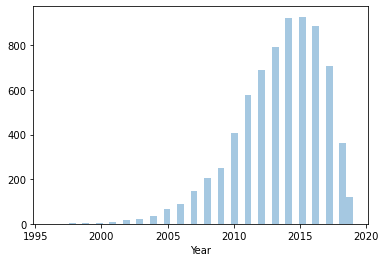

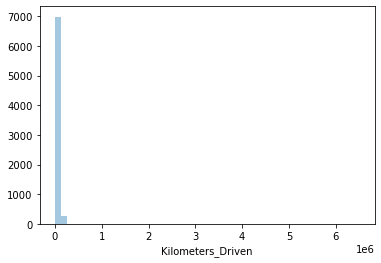

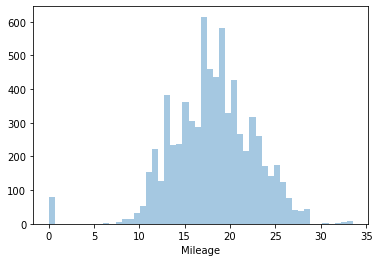

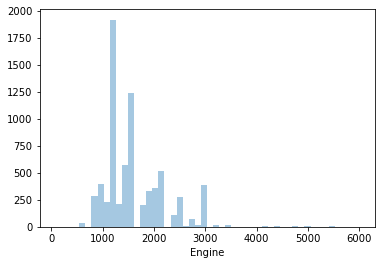

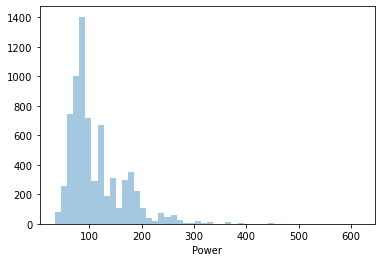

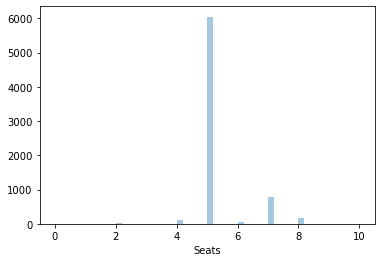

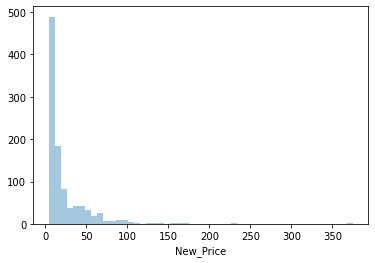

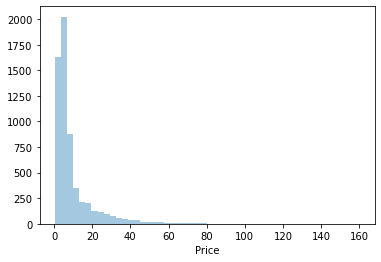

In [39]:
#creating a function to show histogram of numerical variables

for i in df.columns:
    if type(df[i][0])!=str:
        sns.distplot(df[i], kde = False)
        plt.show()

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Kilometers_Driven in Logarithmic Scale (10)')

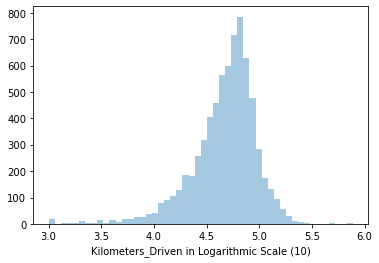

In [90]:
#the plot for 'Kilometers_Driven' seems to be extremely skewed, hence we will convert it into a logarithmic scale for easier readability

sns.distplot(np.log10(df['Kilometers_Driven']), kde = False)
plt.xlabel('Kilometers_Driven in Logarithmic Scale (10)')

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


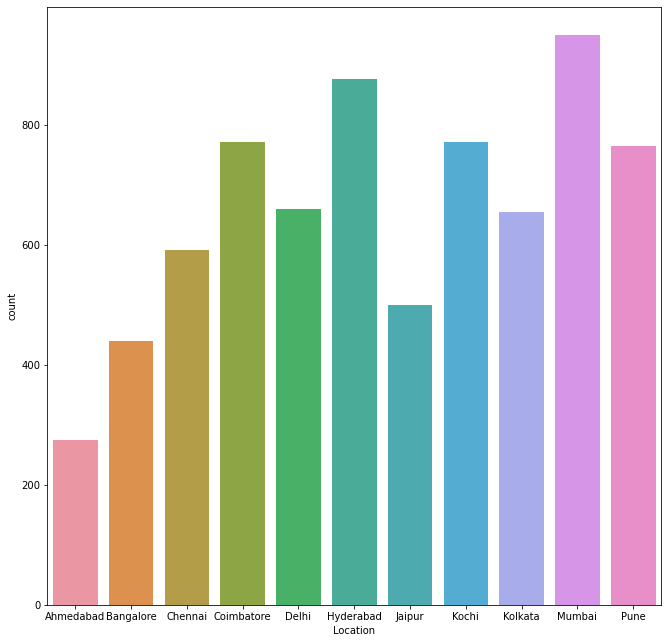

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


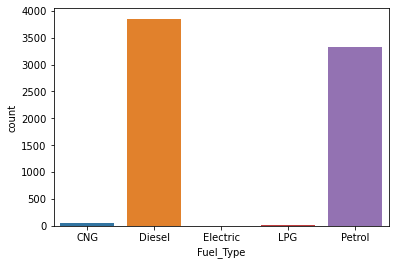

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


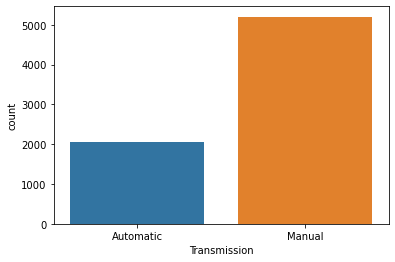

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


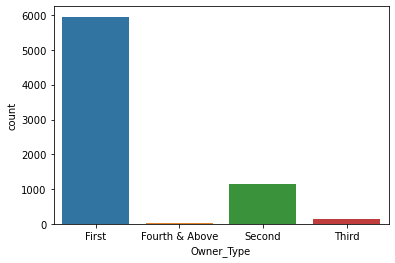

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


In [41]:
for i in df.columns:
    if type(df[i][0])==str:
        if i == 'Location':
            plt.figure(figsize=(11,11))
        sns.countplot(df[i])
        plt.show()
        print(df[i].value_counts())
        

In [42]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


From univariate analysis, we can find that:

1. The Year column is left skewed. Most of the used cars are from around 2015.
2. When logarithmic scale is used, the Kilometers_Driven data is almost normally distributed. 
3. The mileage column has also a somewhat normal distribution. The mean and median of the column is around 18.
4. Engine is right skewed, as it is generally more common for people to have (cheaper) cars with lower engine displacement.
5. Power is also right skewed, as it is generally more common for people to have (cheaper) cars with lower power.
6. Most cars have 5 seats
7. Both New_Price and Price are right skewed.
8. Most of the cars have diesel and petrol as the fuel type.
9. Most cars have manual transmission.
10. Most cars have been used by only one owner.

### Bivariate Analysis

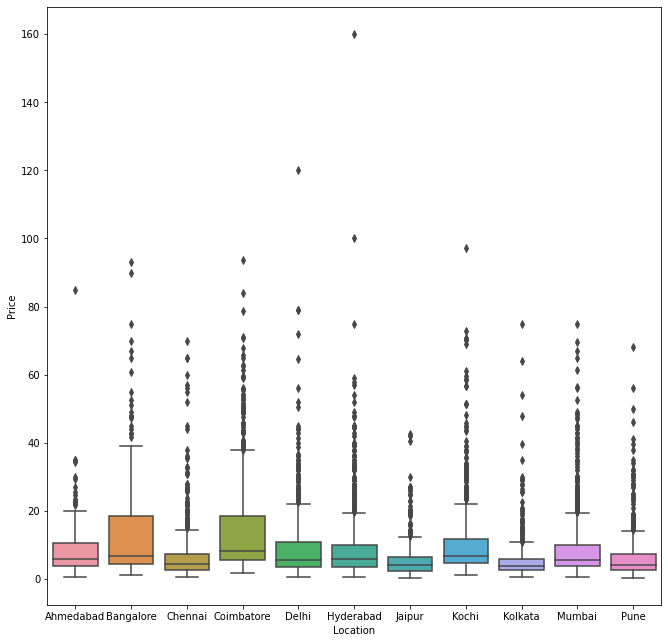

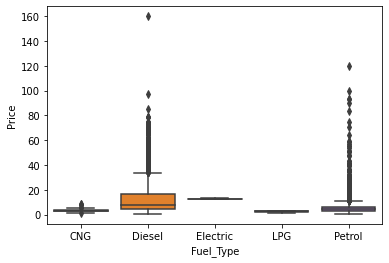

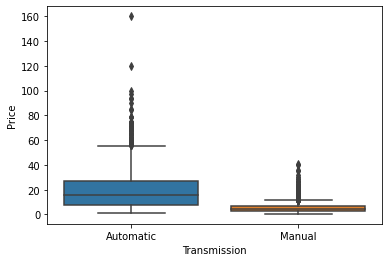

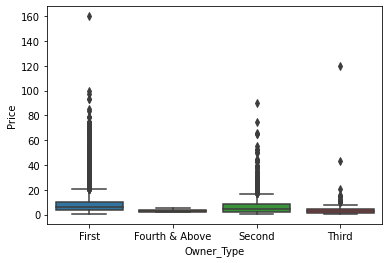

In [43]:
for i in df.columns:
    if type(df[i][0])==str:
        if i == 'Location':
            plt.figure(figsize=(11,11))
        sns.boxplot(data = df, x = i, y = 'Price')
        plt.show()

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


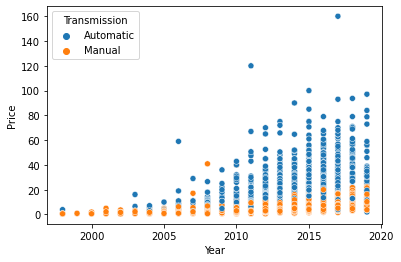

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


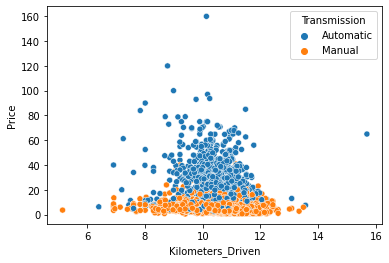

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


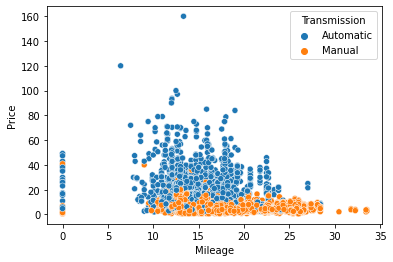

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


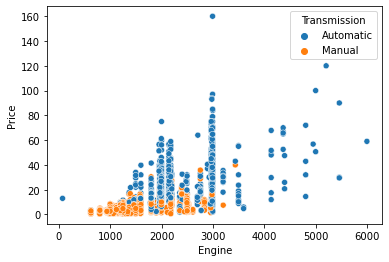

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


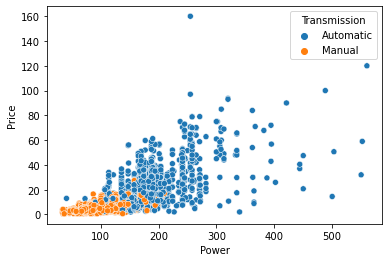

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


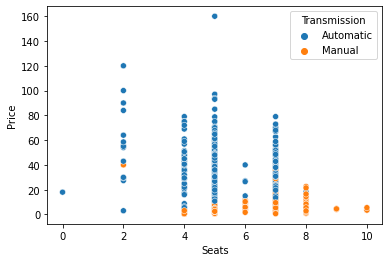

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


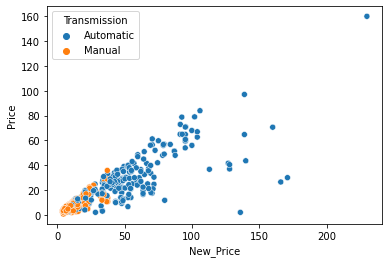

In [44]:
for i in df.columns:
    if type(df[i][0])!=str and i != 'Price':
        if i == 'Kilometers_Driven':
            sns.scatterplot(np.log(df['Kilometers_Driven']), df['Price'], hue = df['Transmission'])
        else:
            sns.scatterplot(df[i], df['Price'], hue = df['Transmission'])
        plt.show()

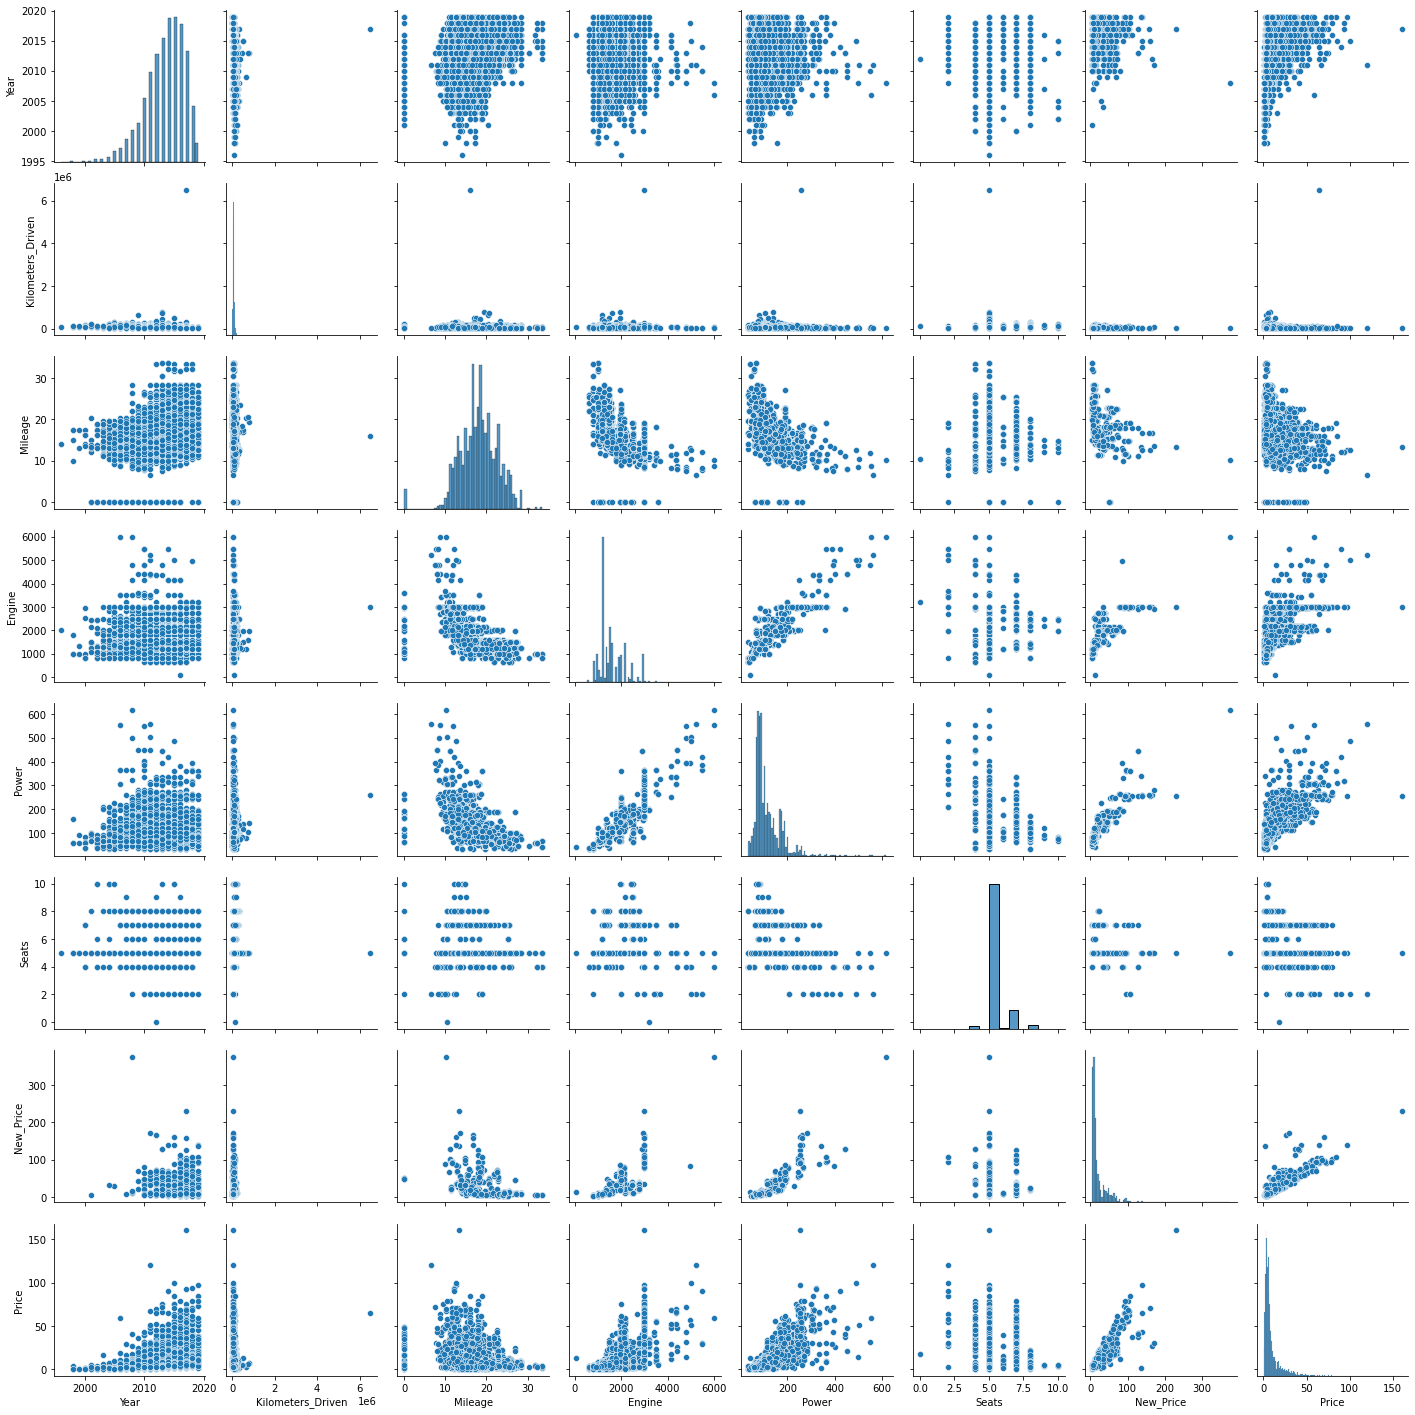

In [45]:
sns.pairplot(df)

The Kilometers_Driven x axis is in natural logarithmic scale.

<AxesSubplot:>

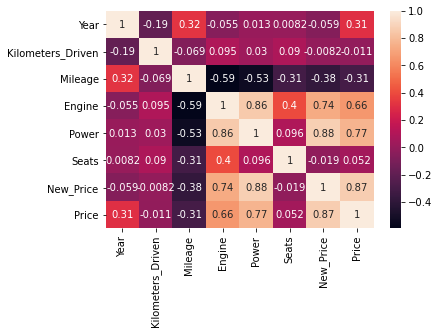

In [46]:
#creating heatmap correlation

sns.heatmap(df.corr(), annot=True)

From bivariate analysis, we can find out that :
1. Cars with automatic transmission are more expensive than those with manual transmission.
2. Cars with diesel as fuel type are generally more expensive than other fuel types.
3. Power and engine are highly correlated.
4. Engine is highly correlated to New_Price and Price
5. Power is highly correlated to New_Price and Price
6. New_Price is highly correlated to Price, as expected.
7. Engine and mileage are somewhat inversely correlated.

### Data Preprocessing/Wrangling

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


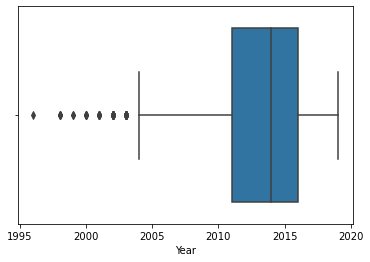

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


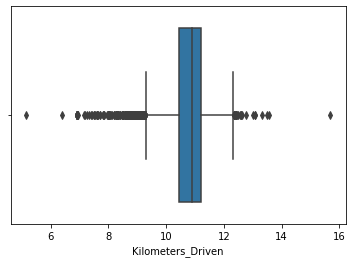

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


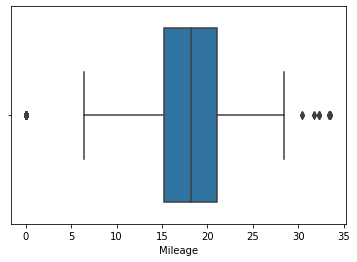

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


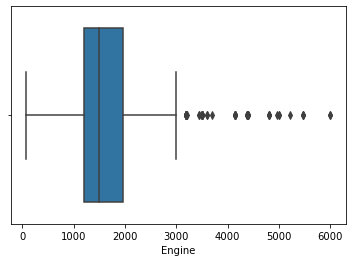

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


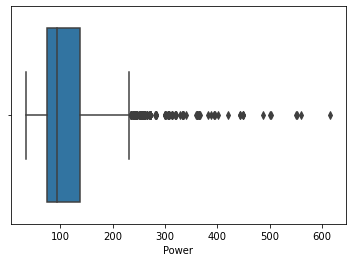

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


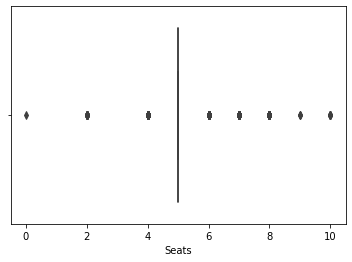

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


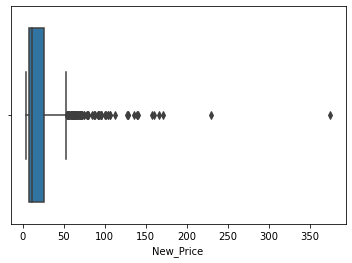

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


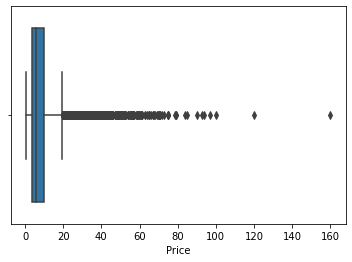

In [47]:
#checking of data using boxplot, for outlier checking

for i in df.columns:
    if type(df[i][0])!=str:
        if i == 'Kilometers_Driven':
            sns.boxplot(np.log(df['Kilometers_Driven']))
        else:
            sns.boxplot(df[i])
        plt.show()

Based on the box plots above, we can see that :

1. There does not seem to be a significant outlier on Year column and there's no typo in it (all data makes sense).
2. There are two outliers on Kilometers_Driven, one on each side.
3. The value 0 in Mileage seems to be outlier.
4. There are no cars with 0 seats, and thus those points are outliers.
5. There are 2 outlier points on Price column.
6. No significant point on Power and Engine.

In [48]:
#outlier removal for Kilometers_Driven

outlier_km = (np.log(df['Kilometers_Driven'])> 14) | (np.log(df['Kilometers_Driven'])<6.4)
df.drop(df[outlier_km].index, inplace = True)

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers_Driven'>

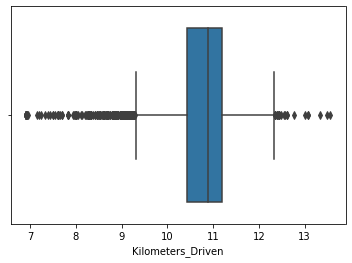

In [49]:
#to check if outliers have been removed

sns.boxplot(np.log(df['Kilometers_Driven']))

In [50]:
#outlier removal for Mileage

df.drop(df[df['Mileage'] == 0].index, inplace = True)

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

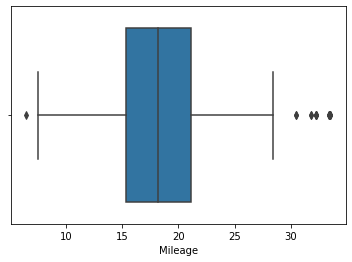

In [51]:
#to check if outliers have been removed

sns.boxplot((df['Mileage']))

In [52]:
#outlier removal for Seats

df.drop(df[df['Seats'] == 0].index, inplace = True)

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats'>

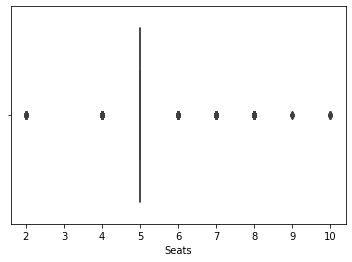

In [53]:
#to check if outliers have been removed

sns.boxplot((df['Seats']))

In [54]:
#outlier removal for Price

df.drop(df[df['Price'] > 110].index, inplace = True)

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

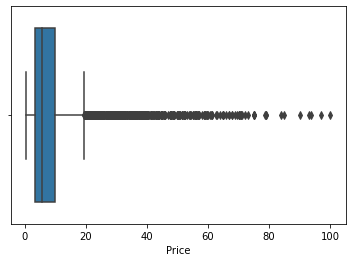

In [55]:
#to check if outliers have been removed

sns.boxplot((df['Price']))

After removing the outliers, we will take care of the missing data. 

In [56]:
#checking of missing data 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7166 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7166 non-null   category
 1   Year               7166 non-null   int64   
 2   Kilometers_Driven  7166 non-null   int64   
 3   Fuel_Type          7166 non-null   category
 4   Transmission       7166 non-null   category
 5   Owner_Type         7166 non-null   category
 6   Mileage            7164 non-null   float64 
 7   Engine             7132 non-null   float64 
 8   Power              7037 non-null   float64 
 9   Seats              7127 non-null   float64 
 10  New_Price          1000 non-null   float64 
 11  Price              5945 non-null   float64 
dtypes: category(4), float64(6), int64(2)
memory usage: 532.7 KB


In [57]:
#checking of missing data total

df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 34
Power                 129
Seats                  39
New_Price            6166
Price                1221
dtype: int64

The column New_Price has too many missing values and hence we will remove the column.

In [58]:
#removal of New_Price column

df.drop('New_Price',axis = 1,inplace=True)

In [59]:
#checking if data has been removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7166 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7166 non-null   category
 1   Year               7166 non-null   int64   
 2   Kilometers_Driven  7166 non-null   int64   
 3   Fuel_Type          7166 non-null   category
 4   Transmission       7166 non-null   category
 5   Owner_Type         7166 non-null   category
 6   Mileage            7164 non-null   float64 
 7   Engine             7132 non-null   float64 
 8   Power              7037 non-null   float64 
 9   Seats              7127 non-null   float64 
 10  Price              5945 non-null   float64 
dtypes: category(4), float64(5), int64(2)
memory usage: 476.7 KB


In [60]:
#removal of missing values

df.dropna(subset=['Mileage', 'Engine','Power','Seats'], inplace=True)

In [61]:
#checking on missing values status

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7034 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7034 non-null   category
 1   Year               7034 non-null   int64   
 2   Kilometers_Driven  7034 non-null   int64   
 3   Fuel_Type          7034 non-null   category
 4   Transmission       7034 non-null   category
 5   Owner_Type         7034 non-null   category
 6   Mileage            7034 non-null   float64 
 7   Engine             7034 non-null   float64 
 8   Power              7034 non-null   float64 
 9   Seats              7034 non-null   float64 
 10  Price              5839 non-null   float64 
dtypes: category(4), float64(5), int64(2)
memory usage: 468.0 KB


Afterwards, we will convert category data type into dummy variables. However, there are too many category for location column, and we will try to simplify it into regions:

1. West - Ahmedabad, Mumbai, Pune
2. South - Bangalore, Chennai, Coimbatore, Hyderabad, Kochi
3. North - Delhi, Jaipur
4. East - Kolkata

In [62]:
def locupdate(input):
    if (input == 'Ahmedabad') or (input == 'Mumbai') or (input == 'Pune'):
        return 'West'
    elif (input == 'Bangalore') or (input == 'Chennai') or (input == 'Coimbatore') or (input == 'Hyderabad') or (input == 'Kochi'):
        return 'South'
    elif (input == 'Kolkata'):
        return 'East'
    elif (input == 'Delhi') or (input == 'Jaipur'):
        return 'North'
    else:
        return input

df['Location'] = df['Location'].apply(locupdate)
    
df['Location'].value_counts()

South    3348
West     1925
North    1130
East      631
Name: Location, dtype: int64

In [63]:
#confirming sum of data

df.shape

(7034, 11)

It can be added to the univariate analysis that most of the data on cars are from Southern India.

In [64]:
#creating dummy variables 
#for Location - when all values are 0, the location is at East

dloc = pd.get_dummies(df['Location'], drop_first=True)
dfuel = pd.get_dummies(df['Fuel_Type'], drop_first=True)
dtrans = pd.get_dummies(df['Transmission'], drop_first=True)
downer = pd.get_dummies(df['Owner_Type'], drop_first=True)

In [65]:
#combining original dataframe and dummy variables

df = pd.concat([df,dloc,dfuel,dtrans,downer], axis = 1)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,South,West,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,West,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,...,0,1,0,0,0,0,1,0,0,0
1,West,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,...,0,1,1,0,0,0,1,0,0,0
2,South,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,1,1,0,0,0
3,South,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,...,1,0,1,0,0,0,1,0,0,0
4,South,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,...,1,0,1,0,0,0,0,0,1,0


In [66]:
#removal of categorical column

df.drop('Location',axis = 1,inplace=True)
df.drop('Fuel_Type',axis = 1,inplace=True)
df.drop('Transmission',axis = 1,inplace=True)
df.drop('Owner_Type',axis = 1,inplace=True)

In [67]:
#checking of data

df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,North,South,West,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,1,0,0,0,0,0,1,0


In [68]:
#Dummy variable for electric fuel type is created, hence we'll see if there's any data for it (as the mileage data for all electric vehicles are null)

df[df['Electric'] == 1]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,North,South,West,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above,Second,Third


In [69]:
#there are no data for electric vehicles. hence we can drop the column 'Electric'

df.drop('Electric',axis = 1,inplace=True)
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,North,South,West,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,1,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,1,0,0,0,0,1,0


C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


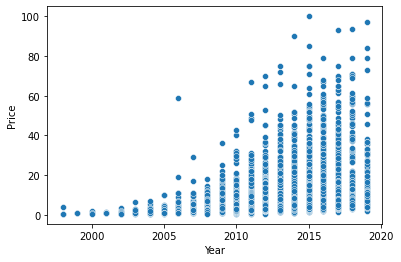

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


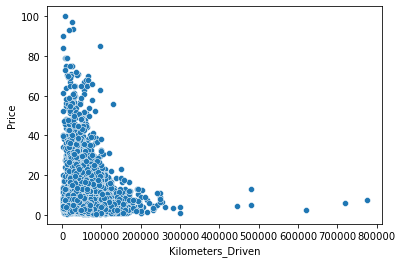

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


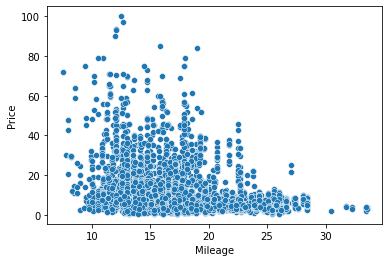

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


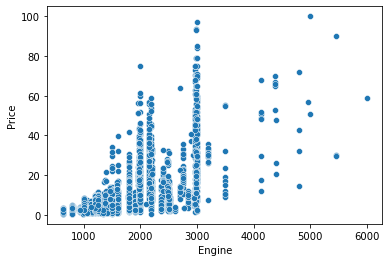

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


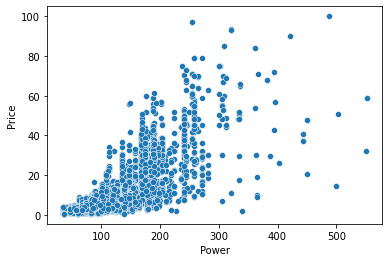

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


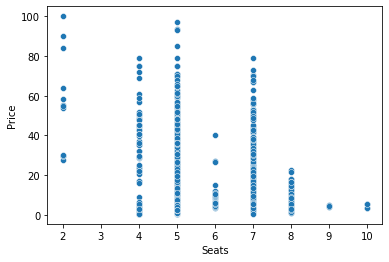

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


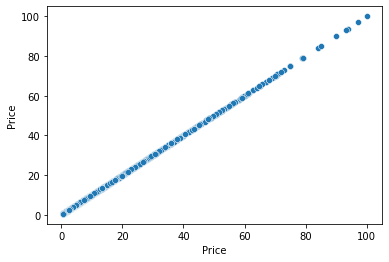

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


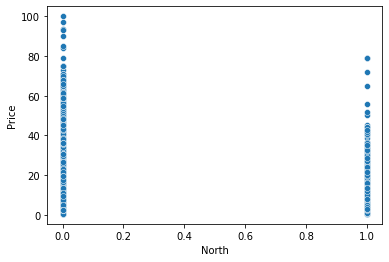

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


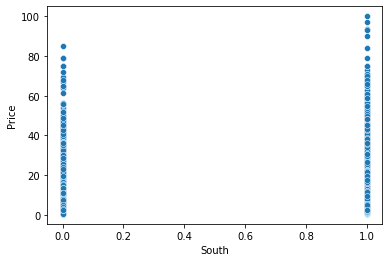

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


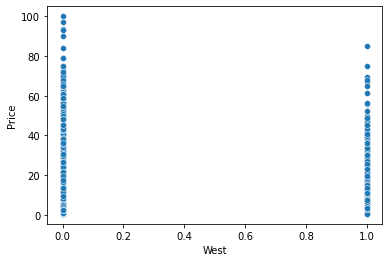

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


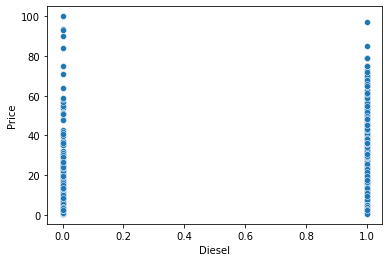

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


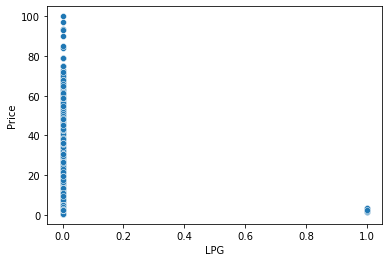

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


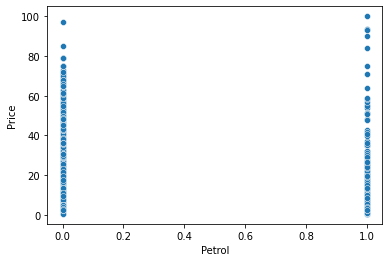

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


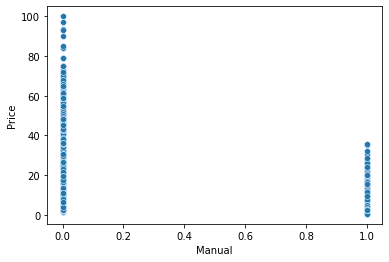

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


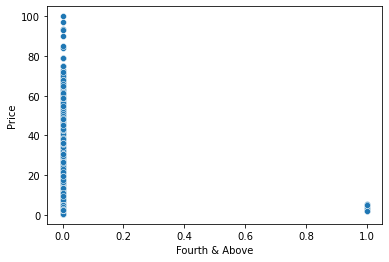

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


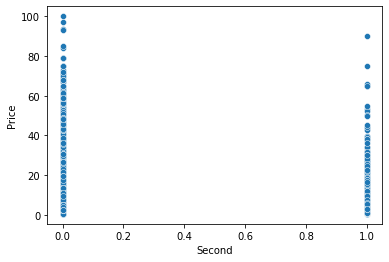

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


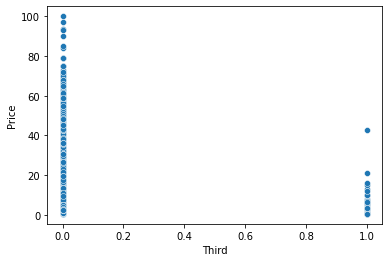

In [70]:
for i in df.columns:
    sns.scatterplot(df[i], df['Price'])
    plt.show()

### Linear Regression Modelling

After modifications above, the dataframe is finally ready for modelling using linear regression. However as per plotting above, linear regression might not be the best approach as the shape of the dependent variables vs independent variable (except dummies) are not exactly similar. There are other assumptions for linear regression, such as zero mean residuals, homoscedasticity, and normality of residuals, where we can only check after completion of linear regression modelling.

There are missing values on the target variable, Price. Here, we will separate the rows with missing target variable and use the linear regression model to find the target variable, Price, of those data with missing target variable.

In [71]:
#separating the data with empty price 

dff = df[df['Price'].isna()==False]
dff.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,North,South,West,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,1,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,1,0,0,0,0,1,0


In [72]:
#building of linear model

# independant variables
x = dff.drop(['Price'], axis=1)

# the dependent variable
y = dff[['Price']]

In [73]:
#importing of library for train/test split
from sklearn.model_selection import train_test_split

#splitting x and y into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [74]:
#importing of library for linear regression fitting
from sklearn.linear_model import LinearRegression

#creating linear regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [75]:
#coefficients for each variable

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#coefficients for intercept

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Year is 0.8334528121289415
The coefficient for Kilometers_Driven is -2.783077248099561e-05
The coefficient for Mileage is -0.16608964542208232
The coefficient for Engine is 0.0006515124756801809
The coefficient for Power is 0.12622836890494474
The coefficient for Seats is -0.7736896238039597
The coefficient for North is 1.3134837962696697
The coefficient for South is 2.3306083714443457
The coefficient for West is 0.7314467115731618
The coefficient for Diesel is -0.5564107586241958
The coefficient for LPG is 1.3647741576504258
The coefficient for Petrol is -3.482113186060177
The coefficient for Manual is -2.4132109425668
The coefficient for Fourth & Above is 4.56925611149674
The coefficient for Second is -0.26005359373181275
The coefficient for Third is 0.20112985212766243
The intercept for our model is -1673.1186747550555


In [76]:
#score of model using training data
regression_model.score(x_train, y_train)

0.7164078120236553

In [77]:
#score of model using testing data
regression_model.score(x_test, y_test)

0.7259158029988864

### Checking of Linear Regression Assumption - Mean of Residual

In [78]:
ypred = regression_model.predict(x_train)
residuals = y_train.values - ypred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.2733297354761846e-14


The mean of residuals are almost zero, which supports the use of linear regression model.

### Checking of Linear Regression Assumption - Homoscedasticity

Using Goldfeld Quandt, we can test for heteroscedasticity.

Null Hypothesis: Residuals are homoscedastic

Alternative Hypothesis: Residuals are heteroscedastic.

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.0107665111833426), ('p-value', 0.4047489402069734)]

 p value is more than 0.05 in Goldfeld Quandt Test, hence we can't reject null hypothesis. We can conclude that the residuals are homoscedastic, which supports the use of linear regression.

### Checking of Linear Regression Assumption - Normality of Residuals

C:\Users\Andrew Susanto\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


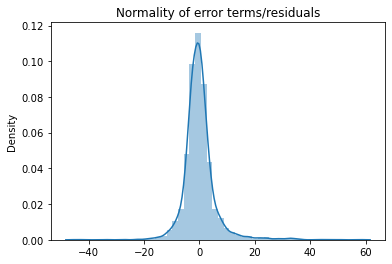

In [80]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

From the plot above, we found out that the error of residuals are normally distributed.

In [81]:
#we can use the model to try to predict the price of the rows with no price data

#taking data with no price value
dfff = df[df['Price'].isna()==True]
dfff.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,North,South,West,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
6019,2014,40929,32.26,998.0,58.20,4.0,NaN,1,0,0,0,0,0,1,0,0,0
6020,2013,54493,24.70,796.0,47.30,5.0,NaN,0,1,0,0,0,1,1,0,1,0
6021,2017,34000,13.68,2393.0,147.80,7.0,NaN,0,0,1,1,0,0,1,0,0,0
6023,2014,29000,18.50,1197.0,82.85,5.0,NaN,0,0,1,0,0,1,1,0,0,0
6024,2016,85609,16.00,2179.0,140.00,7.0,NaN,0,1,0,1,0,0,1,0,1,0


In [82]:
#splitting them to dependent and independent variables
xfff = dfff.drop(['Price'], axis=1)

yfff = dfff[['Price']]

In [83]:
#filling of empty price value

filledy = regression_model.predict(xfff)

Polynomial features can be added to improve model.

In [84]:
#trying to add interaction terms

#importing of polynomialfeatures library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2) 

#score of model with training data
print(poly_clf.score(x_train2, y_train))

0.8646896092345558


In [85]:
#score of model with testing data
print(poly_clf.score(x_test2, y_test))

0.7343379753233221


The model gets better after addition of polynomial features.

In [86]:
#predicting price value of data with missing price data, using the polynomial model

xx = poly.fit_transform(xfff)

In [87]:
yy = poly_clf.predict(xx) 

In [88]:
yy

array([[ 2.54618174],
       [ 2.06803164],
       [18.01499782],
       ...,
       [ 0.99928619],
       [ 5.07169624],
       [23.35362777]])

In [89]:
#confirming score of model, which should be 1 as the y is the result of the regression using the model

print(poly_clf.score(xx, yy))

1.0


### Actionable Insights

1. It will be great if the first branch/most of the branches are located in South area, as there are more customers selling cars on that area.
2. It will be great to sell/focus marketing on cars that are aged around 2015 (around 6 years ago) as the price of the cars will drop significantly after a year.
3. To maximize profit, it will be great to have more stocks on used cars that have automatic transmission, high power and engine displacement, and few mileage as well as few kilometers driven.
4. Most customers have cars with manual transmission, 5 seats, fuel type of diesel/petrol, and lower power and engine displacement, hence it will be great to prepare inventory stock for these type of cars.